Experimenting with new visualisations & features
---

---

In [1]:
from pathlib import Path
import os
_cwd = os.getcwd()

In [2]:
os.chdir(Path(_cwd)/'..') # .\SAE\
os.getcwd()

'C:\\Users\\Giulia\\Study\\projects\\research\\SAE'

In [3]:
import numpy as np
import torch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import itertools

In [10]:
# ------- internal imports
from models import GenerativeAE
import models, metrics, experiments, datasets
from metrics import score_disentanglement 

In [11]:
from experiments import EvaluationManager
from experiments.EvaluationManager import ModelHandler, VisualModelHandler, VectorModelHandler

In [14]:
import importlib
importlib.reload(experiments)
importlib.reload(metrics)
importlib.reload(models)
importlib.reload(EvaluationManager)
importlib.reload(score_disentanglement)

<module 'metrics.score_disentanglement' from 'C:\\Users\\Giulia\\Study\\projects\\research\\SAE\\metrics\\score_disentanglement.py'>

In [15]:
handler = VectorModelHandler(model_name="VecESAE", model_version="standard", data="SynthVec", data_version="standard")

Generating graph...
Generate training samples


Generate testing samples


Storing generated data.
Storing metadata

Done!
Dataset loaded.
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Dataset loaded.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          10,100
         LeakyReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 77]           7,777
         LeakyReLU-4                   [-1, 77]               0
            Linear-5                   [-1, 55]           4,290
         LeakyReLU-6                   [-1, 55]               0
            Linear-7                   [-1, 32]           1,792
         LeakyReLU-8                   [-1, 32]               0
            Linear-9                   [-1, 10]             330
        LeakyReLU-10                   [-1, 10]               0
          FCBlock-11                   [-1, 10]               0
     

In [ ]:
checkpoints = handler.list_available_checkpoints()

In [ ]:
handler.load_checkpoint()

## Plotting Synthetic Vector dataset

Inspiration from https://github.com/derekbanas/seaborn/blob/master/SB%20Tut.ipynb

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [23]:
train = handler.dataloader.train.dataset.dataset
print(train)

Dataset SynthVec info
  Size = 100000
  Factors of variation : 
  factor7_continuous with 20 values
  factor6_continuous with 20 values
  factor3_continuous with 20 values
  factor2_continuous with 20 values
  factor1_continuous with 20 values
  factor0_continuous with 20 values
  factor8_discrete with 13 values
  factor9_discrete with 6 values
  factor5_continuous with 20 values
  factor4_continuous with 20 values
  factor8_continuous with 20 values
  factor9_continuous with 20 values


In [24]:
graph_adj = train.get_graph_matrix()
graph_adj

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
import networkx as nx

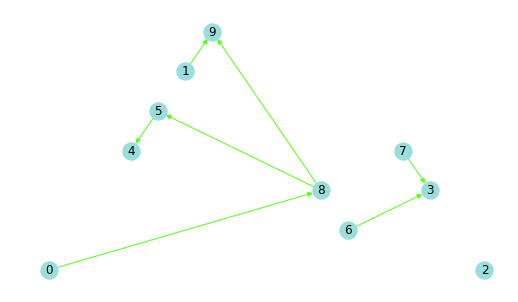

In [29]:
figure = plt.figure(figsize=(7,4))
nx.draw(train.metadata["graph"], with_labels=True, 
        node_size=300, node_color="#99dddd", 
        edge_color="#55ff11", pos=nx.planar_layout(train.metadata["graph"])) 
#this could be a good plot to show 

In [16]:
train.noise 

False

In [56]:
np.std(train.original_labels, axis=0)

array([2.5887727e-03, 3.1722307e-02, 1.2997810e-02, 7.2924486e-06,
       1.5696372e-01, 1.2250427e-01, 1.6126780e-01, 2.0625336e+00,
       3.0675617e-01, 2.5963816e-01], dtype=float32)

In [32]:
samplers = train.metadata["samplers"] # maybe plot this - for each dimension its distribution
samplers

[Normal(loc: tensor([20.6083]), scale: tensor([4.8468])),
 Normal(loc: tensor([4.4481]), scale: tensor([4.5021])),
 Normal(loc: tensor([21.9450]), scale: tensor([3.8092])),
 Normal(loc: tensor([-18.8551]), scale: tensor([3.0201])),
 Normal(loc: tensor([-12.2507]), scale: tensor([4.8170])),
 Normal(loc: tensor([-19.4160]), scale: tensor([8.7639])),
 Normal(loc: tensor([12.6084]), scale: tensor([7.1038])),
 Normal(loc: tensor([2.4544]), scale: tensor([6.1218])),
 Categorical(probs: torch.Size([13])),
 Categorical(probs: torch.Size([6]))]

In [107]:
equations = train.metadata["equations"]
discrete = train.metadata["discrete"]

In [97]:
colors = ["blue", 'orange', 'green', 'red', 'purple', 'cyan', 'brown', 'pink', 'gray', 'olive']

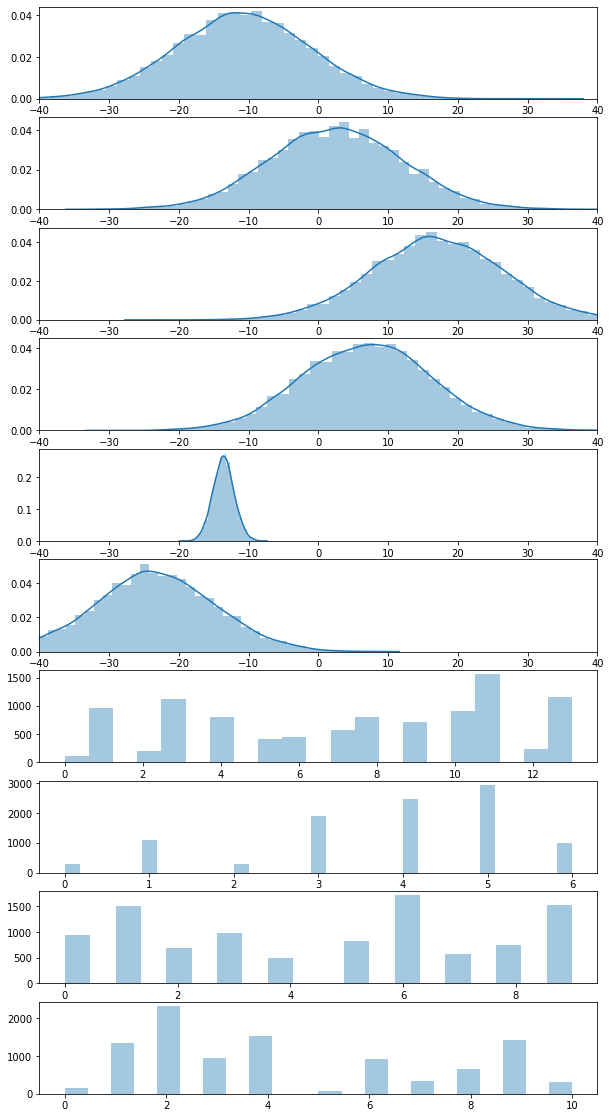

In [113]:
fig, axs = plt.subplots(nrows=len(samplers), figsize=(10,20))
for i in range(len(samplers)):
    if discrete[i]:
        sns.distplot(samplers[i].sample([10000]), ax = axs[i], kde=False)
    else:
        axs[i].set_xlim(-40,40)
        sns.distplot(samplers[i].sample([10000]), ax = axs[i])

In [ ]:
# one plot could be showing noise VS causal variables 

In [129]:
X1,Y1,N1,X2,Y2,N2,metadata = train.read_source_files()

Loading generated data.
Loading metadata


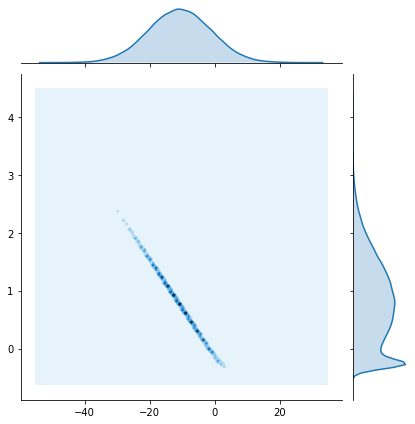

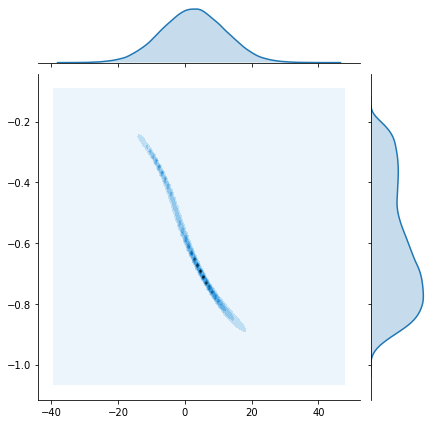

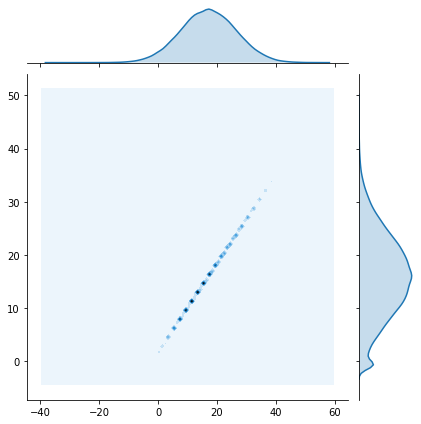

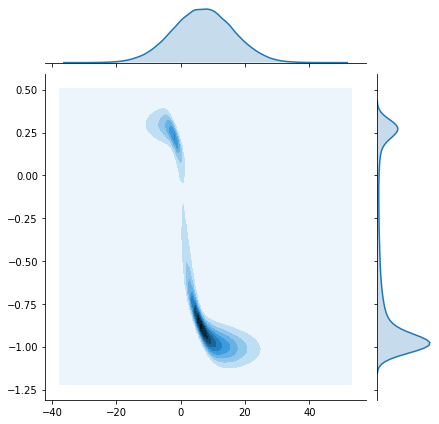

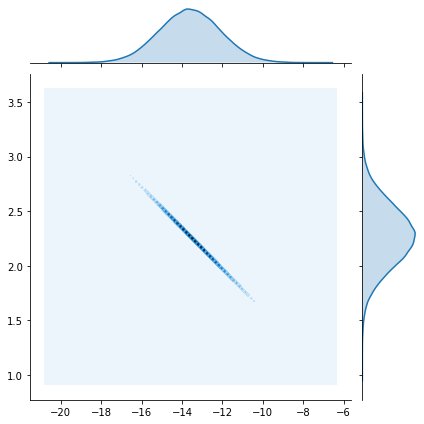

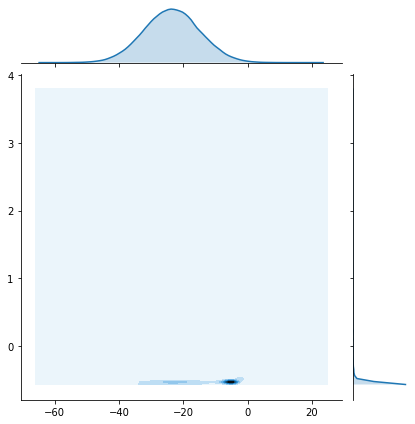

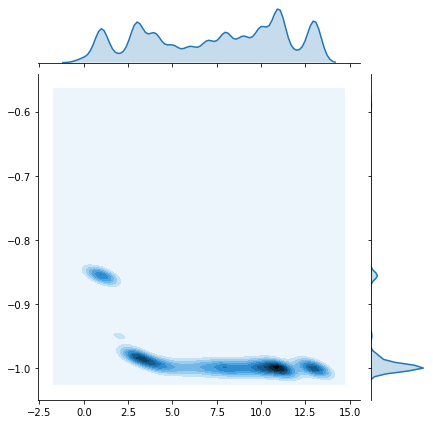

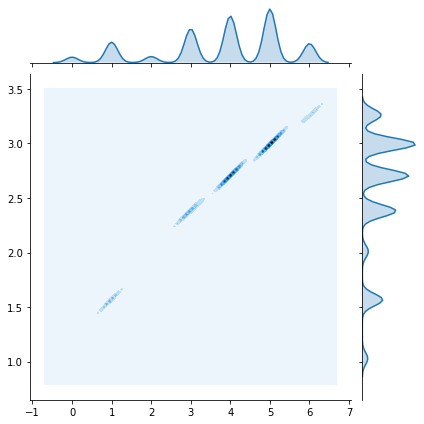

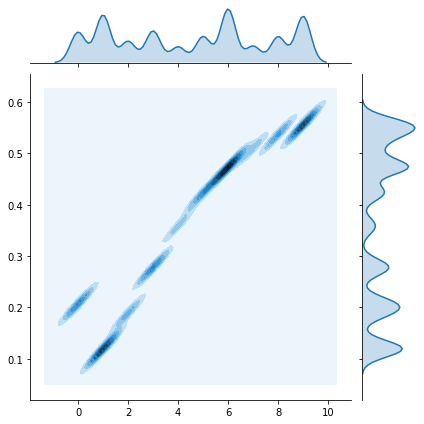

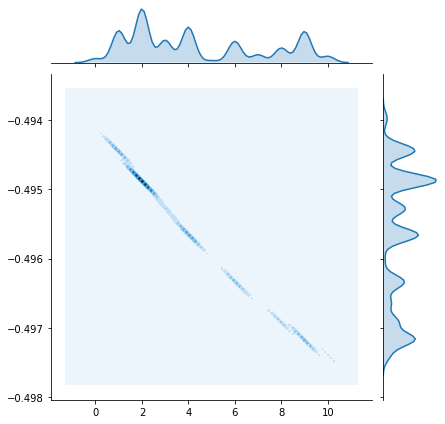

In [135]:
#fig, axs = plt.subplots(nrows=len(samplers), figsize=(10,20))
for i in range(len(samplers)):
    sns.jointplot(N1[:,i], Y1[:,i], kind="kde")

In [ ]:
# one plot could be showing only the causal variables and their relationships 

In [74]:
y_df = pd.DataFrame(y)

In [ ]:
sns.pairplot(y_df)

In [ ]:
sns.pairplot(y_df, kind="kde", corner=True)

In [ ]:
# one plot could be showing just the observables 

In [60]:
train.data.shape

(100000, 100)

## Testing Evaluation Manager features

In [16]:
#handler.model.cpu()
scores = handler.score_model(FID=False, disentanglement=True, orthogonality=True)

Preparing the model for scoring orthogonality ...
Scoring orthogonality
Scoring RBF
Scoring IMQ
Scoring CAT
Scoring model disentanglement.
DCI scoring

IRS scoring
MIG scoring
Modularity explicitness scoring


c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", F

SAP scoring
Time elapsed for scoring 197


In [17]:
scores

{'RBF': tensor(0.0214, grad_fn=<SubBackward0>),
 'IMQ': tensor(0.0607, grad_fn=<SubBackward0>),
 'CAT': tensor(-0.1033, grad_fn=<SubBackward0>),
 'DCI': 0.009742560375922736,
 'IRS': 0.5052642450471774,
 'MIG': 0.012801391251539193,
 'ModExp': 0.16923906307717043,
 'SAP': 0.0007999999999999993,
 'extra_disentanglement': {'DCI': {'informativeness_train': 1.0,
   'informativeness_test': 1.0,
   'disentanglement': 0.009742560375922736,
   'completeness': 0.018517832378044507,
   'extras': {'importance_matrix': array([[0.10050258, 0.07146743, 0.07893085, 0.11849486, 0.10208739,
            0.08668678, 0.11879081, 0.06670444, 0.10104733, 0.14348764],
           [0.08957763, 0.10404264, 0.07635283, 0.06947895, 0.08056334,
            0.11352906, 0.10834403, 0.13110731, 0.08391994, 0.07244694],
           [0.06627475, 0.10460843, 0.06079049, 0.04986709, 0.05887667,
            0.09045006, 0.06478596, 0.07628222, 0.05484582, 0.05941938],
           [0.07350105, 0.0494538 , 0.1124871 , 0.097096

In [ ]:
scores['extra_disentanglement'] =None

In [ ]:
import json
base_path = Path(handler.config['logging_params']['save_dir']) / \
                        handler.config['logging_params']['name'] / \
                        handler.config['logging_params']['version'] / "scoring.json"
with open(base_path, 'w') as o:
    json.dump(scores, o)

In [ ]:
plots = handler.plot_model(do_originals=True, do_reconstructions=True, do_random_samples=True, do_traversals=True)

In [ ]:
plots["random_samples"]

## Visualisations for the Synthetic vectors models

In [18]:
#load all scores and save them in lists 
#extract relevan numbers from the lists and form a df
# plot df with seaborn

In [30]:
handlers = [
    VectorModelHandler(model_name="VecESAE", model_version="standard", data="SynthVec", data_version="standard"),   
    VectorModelHandler(model_name="VecESAE", model_version="standard", data="SynthVec", data_version="discrete"),   
    VectorModelHandler(model_name="VecESAE", model_version="standard", data="SynthVec", data_version="continuous"),   
    VectorModelHandler(model_name="VecESAE", model_version="standard", data="SynthVec", data_version="big")
]

Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Dataset loaded.
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Dataset loaded.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          10,100
         LeakyReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 77]           7,777
         LeakyReLU-4                   [-1, 77]               0
            Linear-5                   [-1, 55]           4,290
         LeakyReLU-6                   [-1, 55]               0
            Linear-7                   [-1, 32]           1,792
         LeakyReLU-8                   [-1, 32]               0
            Linear-9                   [-1, 10]             330
        LeakyReLU-10                   [-1, 10]               0
          FCBlock-11               

VecESAE model loaded.
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Dataset loaded.
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Dataset loaded.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          10,100
         LeakyReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 77]           7,777
         LeakyReLU-4                   [-1, 77]               0
            Linear-5                   [-1, 55]           4,290
         LeakyReLU-6                   [-1, 55]               0
            Linear-7                   [-1, 32]           1,792
         LeakyReLU-8                   [-1, 32]               0
            Linear-9                   [-1, 10]             330
        LeakyReLU-10                   [-1, 10]               0
          FCB

VecESAE model loaded.
